# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [378]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

## All of the exploring and insights will not be added to this notebook ....done in the simple Challenge file

In [379]:
# we start by dropping the transaction_date feature based on the previous exploration of the data
data.drop("transaction_date", axis=1, inplace=True)
real_estate = data.copy()

In [380]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   house_age                 414 non-null    float64
 1   transit_distance          414 non-null    float64
 2   local_convenience_stores  414 non-null    int64  
 3   latitude                  414 non-null    float64
 4   longitude                 414 non-null    float64
 5   price_per_unit            414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


In [381]:
real_estate.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
house_age,414.0,17.712560,11.392485,0.00000,9.025000,16.10000,28.150000,43.80000
transit_distance,414.0,1083.885689,1262.109595,23.38284,289.324800,492.23130,1454.279000,6488.02100
local_convenience_stores,414.0,4.094203,2.945562,0.00000,1.000000,4.00000,6.000000,10.00000
latitude,414.0,24.969030,0.012410,24.93207,24.963000,24.97110,24.977455,25.01459
longitude,414.0,121.533361,0.015347,121.47353,121.528085,121.53863,121.543305,121.56627
price_per_unit,414.0,37.980193,13.606488,7.60000,27.700000,38.45000,46.600000,117.50000


### we definitly have some outliers in the price_per_unit (label)  and transit_distance (feature)

array([[<AxesSubplot:title={'center':'price_per_unit'}>,
        <AxesSubplot:title={'center':'transit_distance'}>]], dtype=object)

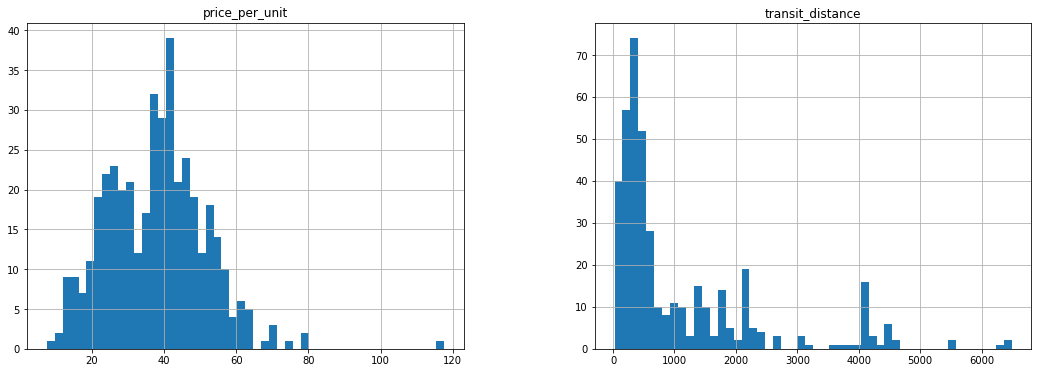

In [382]:
# imports for plotting 
%matplotlib inline
import matplotlib.pyplot as plt

real_estate.hist(["price_per_unit","transit_distance"],bins=50,figsize=(18,6))

# 1. Create a test set

<AxesSubplot:>

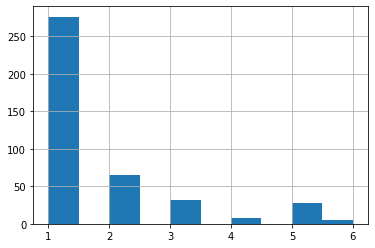

In [383]:
from sklearn.model_selection import StratifiedShuffleSplit

# we will try to use the transit_distance repartion in the data to create a balanced train and test set

real_estate['transit_dist_category'] = pd.cut(real_estate.transit_distance,bins=[0,1000,2000,3000,4000,5000,6500],labels=[1,2,3,4,5,6])
real_estate.transit_dist_category.hist()


In [384]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=42)
for train_index, test_index in split.split(real_estate[real_estate['price_per_unit'] < 80],real_estate[real_estate['price_per_unit'] < 80].transit_dist_category):

    strat_train_set = real_estate.loc[train_index]
    strat_test_set = real_estate.loc[test_index]

for set_ in (strat_test_set,strat_train_set):
    set_.drop("transit_dist_category",axis=1,inplace=True)

# 2. Prepare data for ML algorithms

In [385]:
real_estate = strat_train_set.drop('price_per_unit',axis=1)
real_estate_label = strat_train_set["price_per_unit"].copy()

## try 3 regression algorithms   LinearRegression , DecisionTreeRegression and RandomForestRegression

In [386]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
decision_reg = DecisionTreeRegressor()
forest_reg = RandomForestRegressor()

algorithms = [lin_reg, decision_reg, forest_reg]

In [387]:
for algor in algorithms:
    algor.fit(real_estate,real_estate_label)
    predictions = algor.predict(real_estate)
    rmse = mean_squared_error(real_estate_label,predictions,squared=False)
    print(rmse)


9.0661563559925
1.1516587004833843
3.309674935078359


### let's evaluate how they perform on the test set

In [388]:
X_test = strat_test_set.drop('price_per_unit',axis=1)
y_test = strat_test_set["price_per_unit"].copy()

In [389]:
for algor in algorithms:
    algor.fit(real_estate,real_estate_label)
    predictions = algor.predict(X_test)
    rmse = mean_squared_error(y_test,predictions,squared=False)
    print(rmse)

8.582738557573283
8.692350957351563
6.25694151638883


# 3. Use feature scaling   

### note:
    - feature scaling for the algorithms we use is not necesary (most of the time)

In [390]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


pipeline = Pipeline([('std_scaler',StandardScaler())])
full_pipeline = ColumnTransformer([('standardization',pipeline,list(real_estate))])

real_estate_scaled = full_pipeline.fit_transform(real_estate)


In [391]:
#train data
for algor in algorithms:
    algor.fit(real_estate_scaled,real_estate_label)
    predictions = algor.predict(real_estate_scaled)
    rmse = mean_squared_error(real_estate_label,predictions,squared=False)
    print(rmse)

9.06615635599248
1.1516587004833843
3.2220283187445817


In [392]:
# test data
X_test_scaled = full_pipeline.fit_transform(X_test)

for algor in algorithms:
    algor.fit(real_estate_scaled,real_estate_label)
    predictions = algor.predict(X_test_scaled)
    rmse = mean_squared_error(y_test,predictions,squared=False)
    print("For {} algorithm the rmse is : {}".format(algor,rmse))

For LinearRegression() algorithm the rmse is : 8.639225471089446
For DecisionTreeRegressor() algorithm the rmse is : 14.303536815577743
For RandomForestRegressor() algorithm the rmse is : 7.760877169739028


### we can see that the Root Mean Squared Error is almost identical and in some cases worse

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [394]:
# Your code to use the trained model
import numpy as np

X_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                  [13.6,4082.015,0,24.94155,121.5038]])

final_model = forest_reg

final_model.fit(real_estate,real_estate_label)
results = final_model.predict(X_new)

results


array([48.65981905, 15.90046667])